In [ ]:
##Loan Prediction Classfication

In [ ]:
## Müşteriye Kredi Verilip - Verilmeyeceğini Tahmin Etme

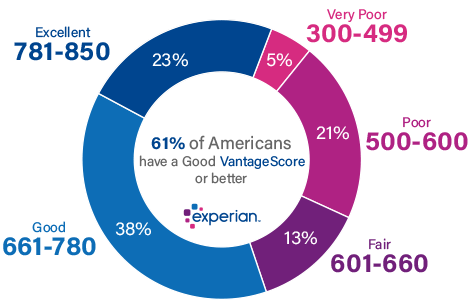

In [ ]:
## Library importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [ ]:
df=pd.read_csv('LoansTrainingSet.csv')

In [ ]:
# EDA ( Exploratory Data Analysis )

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [ ]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


<Axes: >

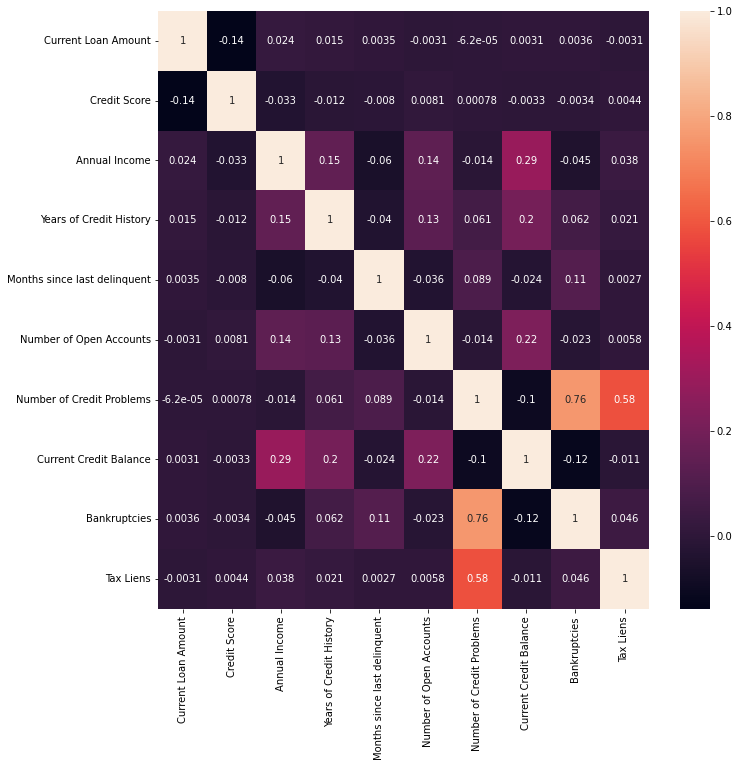

In [ ]:
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
Years of Credit History              0
Maximum Open Credit                  0
Current Credit Balance               0
Number of Credit Problems            0
Number of Open Accounts              0
Loan ID                              0
Monthly Debt                         0
Customer ID                          0
Home Ownership                       0
Term                                 0
Current Loan Amount                  0
Loan Status                          0
Purpose                              0
dtype: int64

In [ ]:
## Object Data Tipinde Kolonları Listelemiş Oluyoruz.
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$584.03,16056
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,4 years,Home Mortgage,other,"$1,106.04",19149
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,"$1,321.85",28335
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,10+ years,Own Home,Debt Consolidation,$751.92,43915
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,4 years,Rent,Debt Consolidation,$355.18,37081
...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,2 years,Rent,Debt Consolidation,"$1,706.58",44080
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,10+ years,Own Home,Debt Consolidation,"$1,376.47",9758
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,9 years,Home Mortgage,Debt Consolidation,$297.96,20090
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,9 years,Home Mortgage,Debt Consolidation,$297.96,20090


In [ ]:
# Normalization and Standardization

In [ ]:
# Sürekli Kullanacağımız internal Function için Generic Function Oluşturulur.
# Don't Repeat Yourself - Kendinizi Sürekli Tekrar Etmeyin

In [ ]:
##Her Seferinde Tek Tek Yazmak Yerine Bi tane Function işimizi Görecektir. DataType bağlı Cond. Çalıştırır.
def fnc_Column_Analysis (pcolumn):
    if(df[pcolumn].dtype == 'O'):
        print('Data Type String')
        print(pcolumn,'Unique List..................................:',df[pcolumn].unique())
        print(pcolumn,'Mode List....................................:',df[pcolumn].mode())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())      
        
        df[pcolumn].value_counts().plot.bar()
        
        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mode()[0], inplace=True)
        
    elif(df[pcolumn].dtype != 'O'):
        print('Data Type integer')        
        print(pcolumn,'Mean List....................................:',df[pcolumn].mean())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())
        
        sns.boxplot(df[pcolumn])

        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mean(), inplace=True)        
            ##df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)

Data Type integer
Credit Score Mean List....................................: 1251.1160986749135
Credit Score NullCount List...............................: 61676
Na Dönüşümü Yapıldı


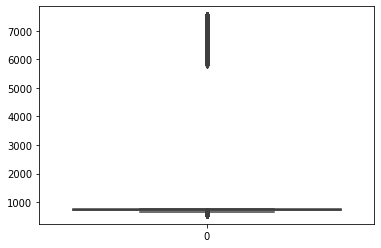

In [ ]:
## Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
fnc_Column_Analysis('Credit Score')

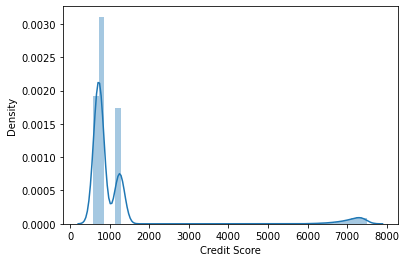

In [ ]:
sns.distplot(df['Credit Score']);

In [ ]:
df['Credit Score'].value_counts()

1251.116099    61676
747.000000      5669
740.000000      5537
741.000000      5499
746.000000      5486
               ...  
6070.000000        3
5980.000000        3
5910.000000        3
5930.000000        2
5860.000000        1
Name: Credit Score, Length: 335, dtype: int64

In [ ]:
##Maximum 800 Kredi Skoru Olabildiğinden burada Anormal bir duurm mevcut.
df["Credit Score"] =np.where(df["Credit Score"] > 800, 800, df["Credit Score"])

In [ ]:
df['Credit Score'].value_counts().sort_values(ascending=False)

800.0    77863
747.0     5669
740.0     5537
741.0     5499
746.0     5486
         ...  
585.0       18
590.0       18
593.0       17
591.0       15
589.0       15
Name: Credit Score, Length: 168, dtype: int64

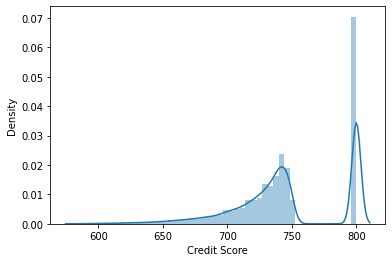

In [ ]:
sns.distplot(df['Credit Score']);

Data Type integer
Annual Income Mean List....................................: 71952.71618674094
Annual Income NullCount List...............................: 61676
Na Dönüşümü Yapıldı


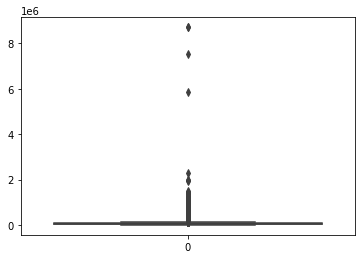

In [ ]:
# Annual Income: The customer's annual income
fnc_Column_Analysis('Annual Income')

In [ ]:
##Months since last delinquent: Months since the last loan delinquent payment
df['Months since last delinquent'].value_counts().sort_values(ascending=False)

12.0     2224
14.0     2196
15.0     2189
8.0      2164
9.0      2127
         ... 
112.0       1
149.0       1
133.0       1
115.0       1
119.0       1
Name: Months since last delinquent, Length: 131, dtype: int64

In [ ]:
df['Months since last delinquent'].isnull().sum()

140383

In [ ]:
#Boşları 0 doldulrluld.
df['Months since last delinquent'].fillna("0",inplace=True)
#Data Type Dönüşümü Yapıldı.
df['Months since last delinquent']=df['Months since last delinquent'].astype(int)

In [ ]:
## 90 üzerinde anlamsız verileri düzenlemiş olduk 
df['Months since last delinquent'] =np.where(df['Months since last delinquent'] > 90, 90, df['Months since last delinquent'])

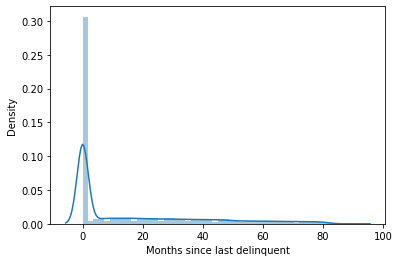

In [ ]:
sns.distplot(df['Months since last delinquent']);

In [ ]:
## Years in current job: A categorical variable indicating how many years the customer has been in their current job.
df['Years in current job']

0         10+ years
1           4 years
2         10+ years
3         10+ years
4           4 years
            ...    
256979      2 years
256980    10+ years
256981      9 years
256982      9 years
256983    10+ years
Name: Years in current job, Length: 256984, dtype: object

In [ ]:
## Gereksiz Karekterlerin Kaldırılması + years
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)

Data Type String
Years in current job Unique List..................................: ['10' '4' '6' '5' nan '3' '2' '1' '7' '9' '8']
Years in current job Mode List....................................: 0    10
Name: Years in current job, dtype: object
Years in current job NullCount List...............................: 11476
Na Dönüşümü Yapıldı


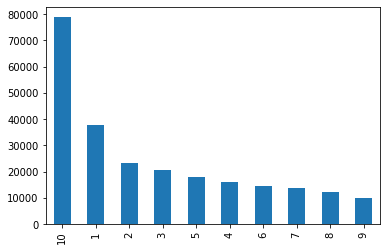

In [ ]:
fnc_Column_Analysis('Years in current job')

In [ ]:
## DataType Dönüşümü Yapıldı.
df['Years in current job']=df['Years in current job'].astype(int)

In [ ]:
## Maximum Open Credit: The maximum credit limit for all credit sources.
df['Maximum Open Credit']

0         16056
1         19149
2         28335
3         43915
4         37081
          ...  
256979    44080
256980     9758
256981    20090
256982    20090
256983    62371
Name: Maximum Open Credit, Length: 256984, dtype: object

In [ ]:
df['Maximum Open Credit'].isnull().sum()

0

In [ ]:
## Kirli Veriler Temizlendi. ve Datatype dönüşümü Yapıldı.
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

In [ ]:
#Bankruptcies: The number of bankruptcies
df['Bankruptcies'].isnull().sum()

529

Data Type integer
Bankruptcies Mean List....................................: 0.11031564991908911
Bankruptcies NullCount List...............................: 529
Na Dönüşümü Yapıldı


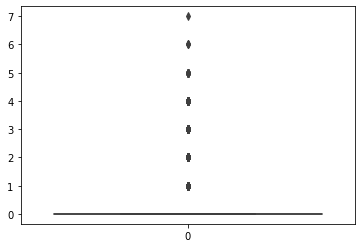

In [ ]:
fnc_Column_Analysis('Bankruptcies')

In [ ]:
df['Bankruptcies']=df['Bankruptcies'].astype(int)

In [ ]:
df["Bankruptcies"] =np.where(df["Bankruptcies"] >= 3, 3, df["Bankruptcies"])

<Axes: xlabel='Bankruptcies', ylabel='Count'>

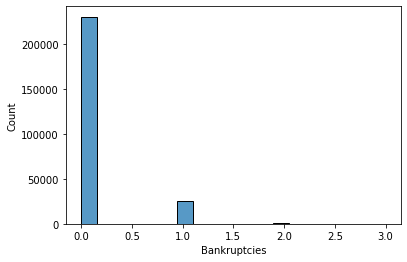

In [ ]:
sns.histplot(df['Bankruptcies'])

In [ ]:
## Tax Liens: The number of tax liens.
df['Tax Liens']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
256979    0.0
256980    0.0
256981    0.0
256982    0.0
256983    0.0
Name: Tax Liens, Length: 256984, dtype: float64

Data Type integer
Tax Liens Mean List....................................: 0.027202571596467946
Tax Liens NullCount List...............................: 23
Na Dönüşümü Yapıldı


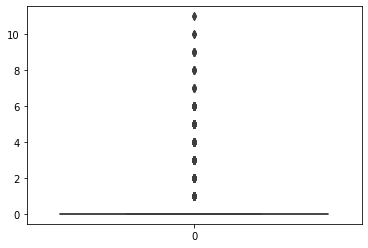

In [ ]:
fnc_Column_Analysis('Tax Liens')

In [ ]:
df['Tax Liens']=df['Tax Liens'].astype(int)

In [ ]:
df["Tax Liens"] =np.where(df["Tax Liens"] >= 3, 3, df["Tax Liens"])

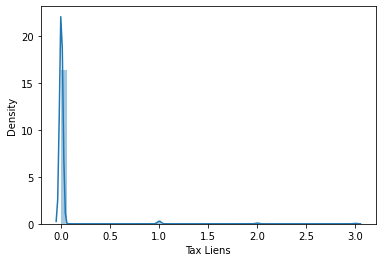

In [ ]:
sns.distplot(df["Tax Liens"]);

In [ ]:
## Monthly Debt: The customer's monthly payment for their existing loans
df['Monthly Debt']

0            $584.03
1         $1,106.04 
2         $1,321.85 
3            $751.92
4            $355.18
             ...    
256979    $1,706.58 
256980    $1,376.47 
256981       $297.96
256982       $297.96
256983    $2,525.82 
Name: Monthly Debt, Length: 256984, dtype: object

In [ ]:
#Monthly Debt object türünden fazla olan semboller kaldırılarak float türüne çevrildi
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

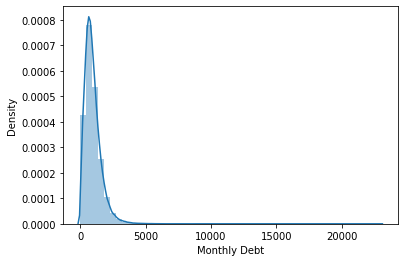

In [ ]:
sns.distplot(df['Monthly Debt']);

In [ ]:
df['Monthly Debt'] =np.where(df['Monthly Debt'] >= 5000, 5000, df['Monthly Debt'])

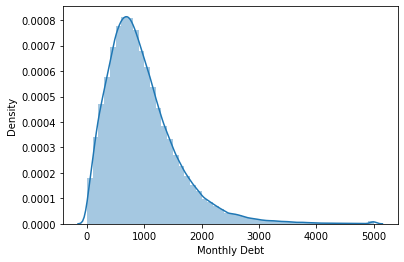

In [ ]:
sns.distplot(df['Monthly Debt']);

In [ ]:
##Boş KKoln varmı  die yeniden bir bakyoryzç
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
##Object Tipinde verilerimize  yeniden bir  bakıyruz.
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,Home Mortgage,other
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,Own Home,Debt Consolidation
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,Rent,Debt Consolidation
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,Own Home,Debt Consolidation
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,Home Mortgage,Debt Consolidation
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,Home Mortgage,Debt Consolidation


In [ ]:
#Loan Status: A categorical variable indicating if the loan was paid back or defaulted

In [ ]:
df['Loan Status'].value_counts()

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

<Axes: >

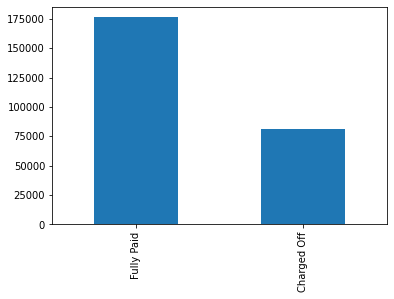

In [ ]:
df['Loan Status'].value_counts().plot.bar()

In [ ]:
##Term: A categorical variable indicating if it is a short term or long term loan
df['Term'].value_counts()

Short Term    192632
Long Term      64352
Name: Term, dtype: int64

<Axes: >

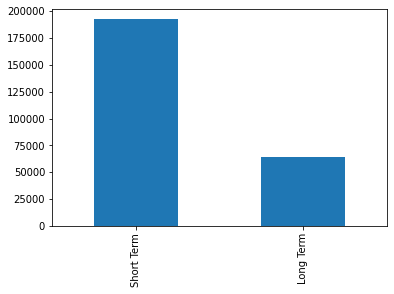

In [ ]:
df['Term'].value_counts().plot.bar()

In [ ]:
#Home Ownership: Categorical variable indicating home ownership. 
#Values are "Rent", "Home Mortgage", and "Own". 
#If the value is OWN, then the customer is a home owner with no mortgage
df['Home Ownership'].value_counts() 

Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: Home Ownership, dtype: int64

In [ ]:
#Home Ownership -- Have leri Home olarak Replace Ediyoru
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [ ]:
df['Home Ownership'].value_counts() 

Mortgage    125051
Rent        109010
Own Home     22923
Name: Home Ownership, dtype: int64

<Axes: >

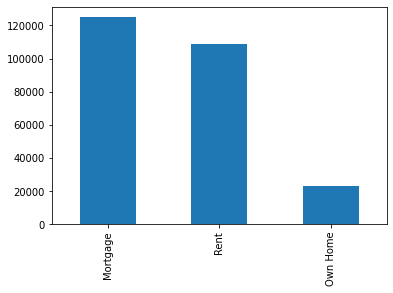

In [ ]:
df['Home Ownership'].value_counts().plot.bar()

In [ ]:
##Purpose: A description of the purpose of the loan
df['Purpose'].value_counts()

Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

In [ ]:
df['Purpose'].replace('other','Other',inplace=True)

In [ ]:
df['Purpose'].value_counts()

Debt Consolidation      203911
Other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: Purpose, dtype: int64

<Axes: >

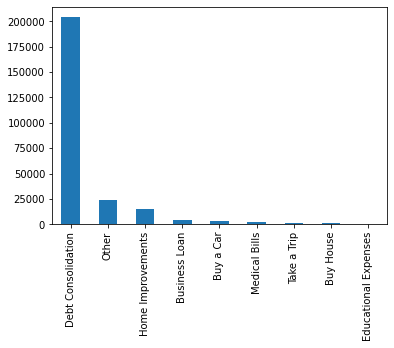

In [ ]:
df.Purpose.value_counts().plot.bar()

In [ ]:
##Kullanmayacağımız Unique Id Kolonlarımzı Kaldırabiliriz.
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [ ]:
x,y=df.drop('Loan Status',axis=1),df[['Loan Status']]

In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
y=pd.get_dummies(y,drop_first=True)

In [ ]:
y.shape,x.shape,df.shape

((256984, 1), (256984, 24), (256984, 17))

In [ ]:
x.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,741.0,10,33694.0,584.03,12.3,41,10,0,6760,16056.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,3441,734.0,4,42269.0,1106.04,26.3,0,17,0,6262,19149.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21029,747.0,10,90126.0,1321.85,28.8,0,5,0,20967,28335.0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,18743,747.0,10,38072.0,751.92,26.2,0,9,0,22529,43915.0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,11731,746.0,4,50025.0,355.18,11.5,0,12,0,17391,37081.0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
## Classic Classification Models ile Çözümü

In [ ]:
def fnc_classification_all_model(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [ ]:
fnc_classification_all_model(x,y)

,accuracy_score,f1_score,recall_score,precision_score
RandomForestClassifier,0.756514,0.805930,0.736180,0.890281
XGBClassifier,0.716620,0.775296,0.711861,0.851142
GradientBoostingClassifier,0.707562,0.768158,0.705446,0.843108
DecisionTreeClassifier,0.700931,0.757601,0.680538,0.854346
BernoulliNB,0.662625,0.764148,0.795834,0.734889
KNeighborsClassifier,0.613953,0.674232,0.581718,0.801737
LogisticRegression,0.492684,0.442426,0.293080,0.902121
GaussianNB,0.450612,0.333736,0.200358,0.998306
SVC,0.449865,0.331871,0.198953,0.999886


In [ ]:
##Pycaret ile Classification Models